# K Nearest Neighbour
KNN is a supervised learning algorithm. It is used for classification and regression. It is a type of instance-based learning algorithm, or memory-based learning algorithm.

In [42]:
# import libraries
import pandas as pd
import numpy as np  
import seaborn as sns
# import data
df = sns.load_dataset('iris')
# 1. 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

In [45]:
# Train Test split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)   


In [46]:
# call the model
model=KNeighborsClassifier(n_neighbors=3)
# fit the model
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# prediction
y_pred=model.predict(X_test)


In [48]:
# evaluate the model

print("Evaluating the model...")
print(f'classification_report :{y_test,y_pred}')

Evaluating the model...
classification_report :(73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object, array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'vir

<Axes: >

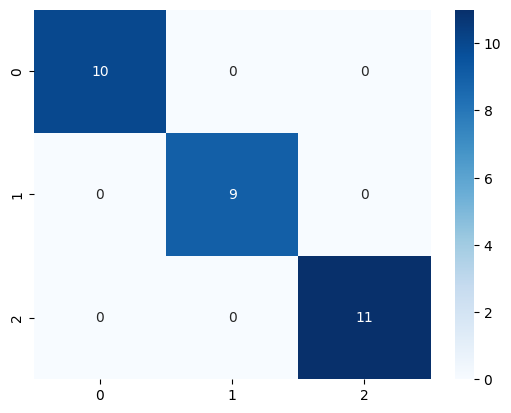

In [49]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---
# Regression using KNN Regresser

In [68]:
# Regression using KNN on tips dataset
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df=sns.load_dataset('tips') 

In [69]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [71]:
# split the data into X and y
X = df.drop('tip', axis=1)
y = df['tip']


In [72]:
le=LabelEncoder()
# label encode the categorical variable using for loop
for col in X.columns:
    if X[col].dtype=='object'or X[col].dtype=='category':

     X[col]=le.fit_transform(X[col])
print(X[col].head())



0    2
1    3
2    3
3    2
4    4
Name: size, dtype: int64


In [77]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# call the model
model=KNeighborsRegressor(n_neighbors=3)
# fit the model
model.fit(X_train,y_train)

# predict the model
y_pred=model.predict(X_test)

print(f'r2_score:{r2_score(y_test,y_test)}')
print(f'mean_squared_error:{mean_squared_error(y_test,y_test)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')

r2_score:1.0
mean_squared_error:0.0
RMSE : 1.007750914046673


In [75]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [76]:
# predict the unknown

model.predict([[19,1,0,1,1,2]])

c:\Users\Aaima Amir\miniconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.78333333])